In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [27]:
train_inputs = pd.read_csv("regression-dataset/train_inputs.csv").values  
train_targets = pd.read_csv("regression-dataset/train_targets.csv").values.ravel()  
test_input = pd.read_csv("regression-dataset/test_inputs.csv").values
test_targets = pd.read_csv("regression-dataset/test_targets.csv").values.ravel()



Testing learning rate: 0.1
MSE for 0.1: 1.413572106992406
Testing learning rate: 0.2
MSE for 0.2: 1.576499679815156
Testing learning rate: 0.30000000000000004
MSE for 0.30000000000000004: 1.7399137704895584
Testing learning rate: 0.4
MSE for 0.4: 2.036057955761304
Testing learning rate: 0.5
MSE for 0.5: 2.5490008693370276
Testing learning rate: 0.6
MSE for 0.6: 3.7377298131427907
Testing learning rate: 0.7000000000000001
MSE for 0.7000000000000001: 5.455887896444888
Testing learning rate: 0.8
MSE for 0.8: 7.4020482392893685
Testing learning rate: 0.9
MSE for 0.9: 9.184476470715333
Testing learning rate: 1.0
MSE for 1.0: 7.999381434544506


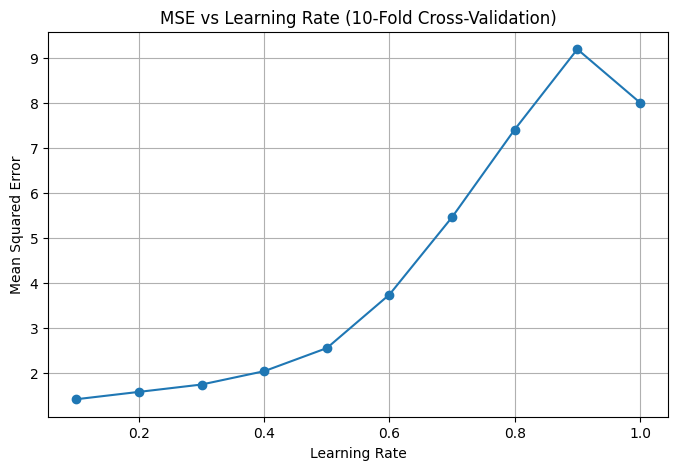

Best Learning Rate: 0.1
Cross-Validation MSE: 1.413572106992406
Test MSE: 1.5318262703219885


In [28]:
learning_rates = np.arange(0.1, 1.1, 0.1)  

kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_values = []  

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1000, tol=1e-3, random_state=42)
    mse = -cross_val_score(model, train_inputs, train_targets, cv=kf, scoring='neg_mean_squared_error').mean()
    print(f"MSE for {lr}: {mse}")
    mse_values.append(mse)

best_lr_index = np.argmin(mse_values)
best_learning_rate = learning_rates[best_lr_index]
best_mse = mse_values[best_lr_index]

final_model = SGDRegressor(learning_rate='constant', eta0=best_learning_rate, max_iter=1000, tol=1e-3, random_state=42)
final_model.fit(train_inputs, train_targets)

final_predictions = final_model.predict(test_input)
test_mse = mean_squared_error(test_targets, final_predictions)

plt.figure(figsize=(8, 5))
plt.plot(learning_rates, mse_values, marker='o', linestyle='-')
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Learning Rate (10-Fold Cross-Validation)")
plt.grid()
plt.show()

# Print results
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Cross-Validation MSE: {best_mse}")
print(f"Test MSE: {test_mse}")